In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('credit_risk_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (32581, 12)

Columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']

First few rows:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [17]:
print("Missing values:")
print(df.isnull().sum())
df = df.dropna()

le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
X = df.drop('loan_status', axis=1)
y = df['loan_status']

Missing values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

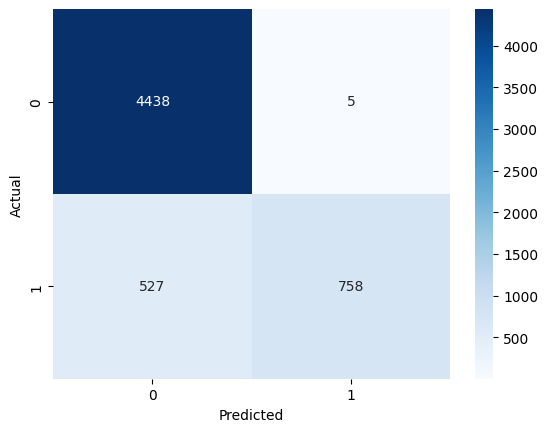

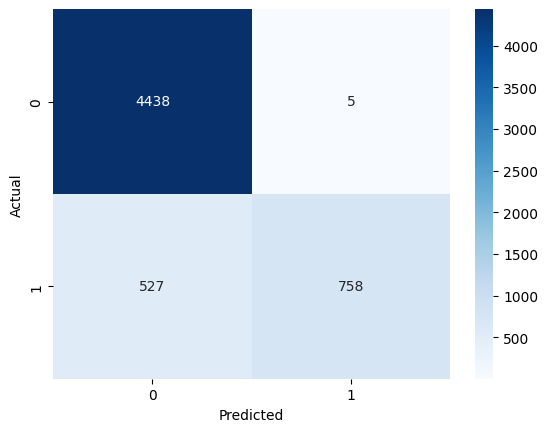

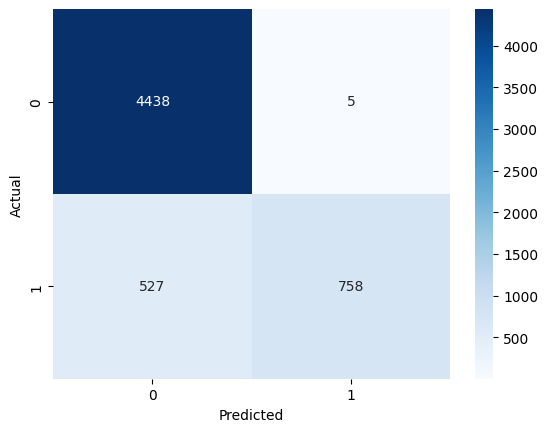

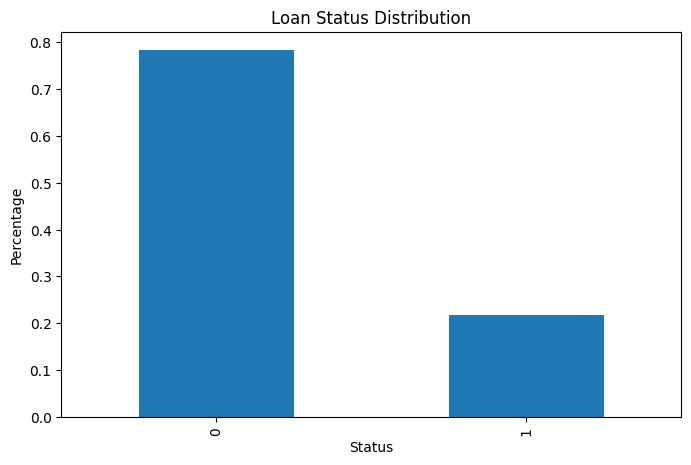

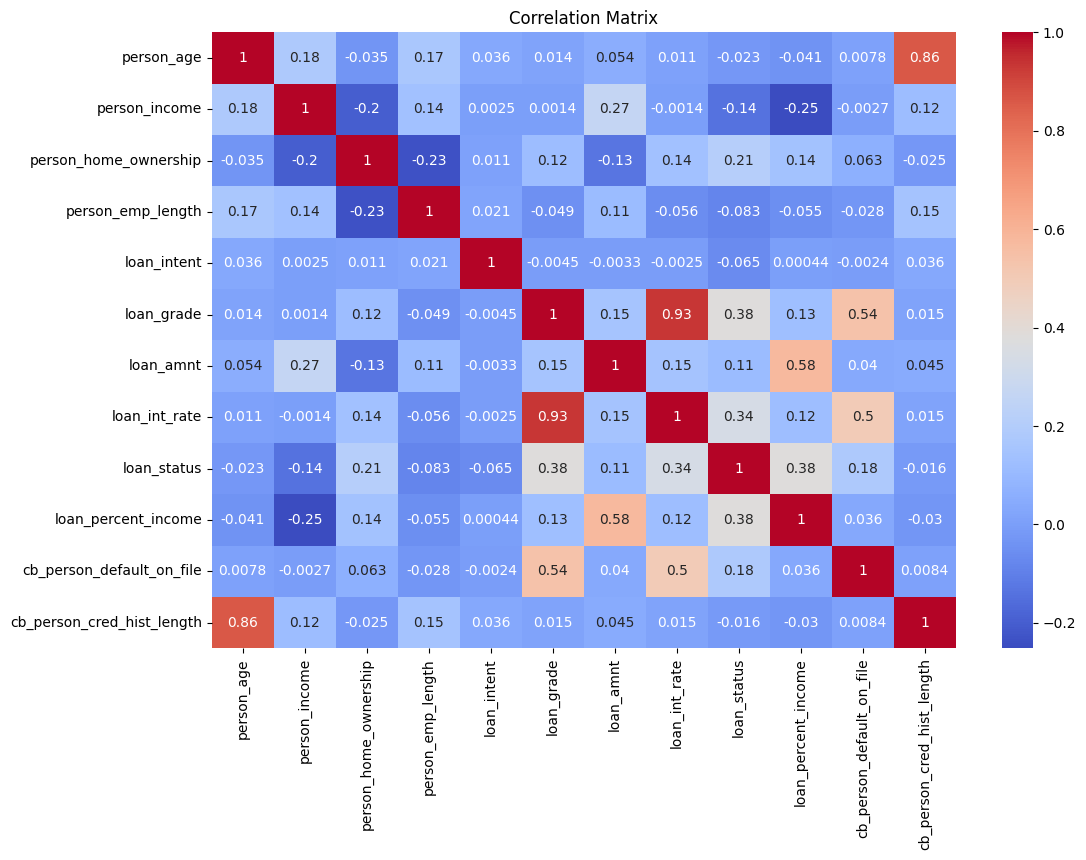

In [19]:
plt.figure(figsize=(8, 5))
y.value_counts(normalize=True).plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9071229050279329

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4443
           1       0.99      0.59      0.74      1285

    accuracy                           0.91      5728
   macro avg       0.94      0.79      0.84      5728
weighted avg       0.92      0.91      0.90      5728



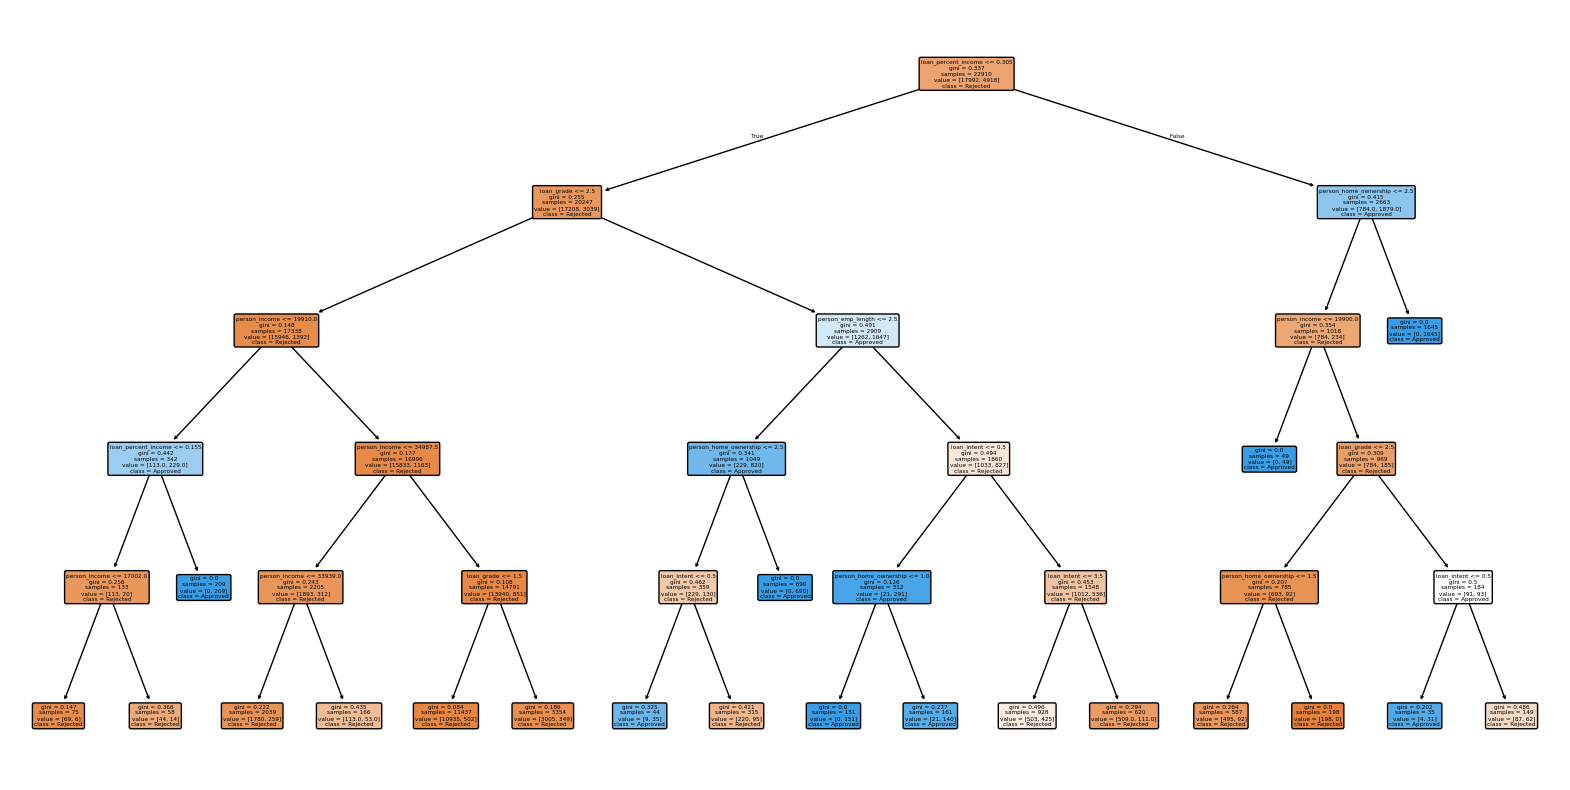

In [21]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Rejected', 'Approved'],
          filled=True, rounded=True)
plt.show()

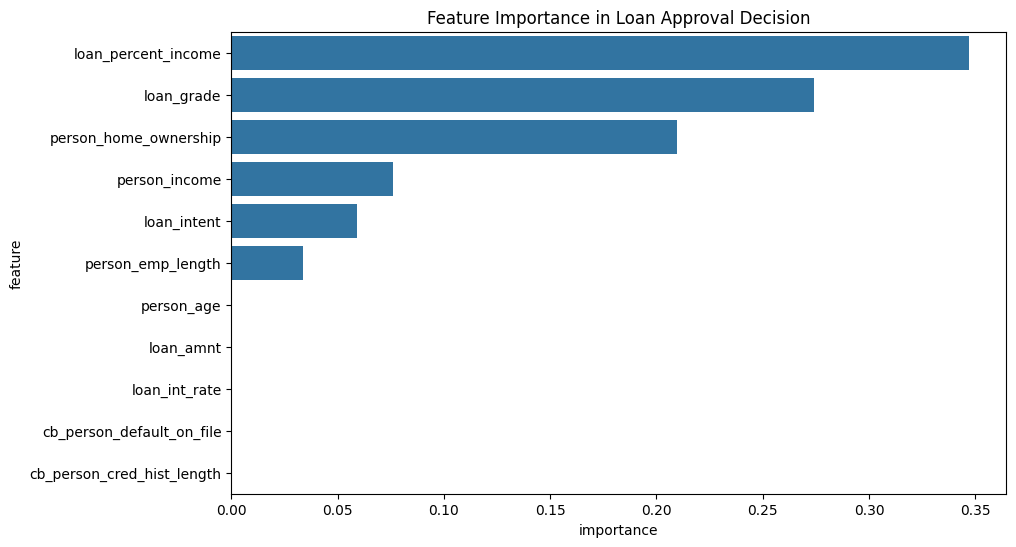

In [22]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
importance = importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance, x='importance', y='feature')
plt.title('Feature Importance in Loan Approval Decision')
plt.show()

In [23]:
import joblib
joblib.dump(model, 'CreditRiskDetector.joblib')

['CreditRiskDetector.joblib']